In [48]:
#LON="--lon_range '(136.65, 136.75)'"  # PortMac
#LAT="--lat_range '(-15.801, -15.901)'"
#LON="--lon_range '(152.30, 152.40)'"  #Bundaberg
#LAT="--lat_range '(-24.801, -24.901)'"
LON="--lon_range '(152.30, 152.40)'"  
LAT="--lat_range '(-24.701, -24.801)'"
YEAR="--year_range 1986-2017"  # requirement mandatory
DEB="--debug"
%run extract_tidal_datelist.py $LON $LAT $YEAR $DEB
my_data=MY_DATE['ALL_TIDES']

Input date range 1986-2017 starting extracting datelist 16:51:30.355548
running task for epoch 1986-01-01 TO 2017-01-01 tide post  for lon/lat range (152.30, 152.40)(-24.701, -24.801) epoch 40
 doing for sensor ls5_nbar_albers
 epoch end date is reset for LS5 2011/12/01
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
reading from tidal model file and using Haversine algorithm to extract shortest distance
Found tide post coordinates,depth and shortest distance ('152.68', '-24.78', '-1061', 33.47521236685792)
received from predict tides  2017-03-05 16:53:35.884858

ALL TIDES LIST [['2016-06-29', -1.059], ['2015-06-11', -1.005], ['1994-06-17', -1.003], ['1993-05-29', -0.988], ['2002-07-17', -0.955], ['1995-07-06', -0.94], ['2006-06-18', -0.927], ['2005-05-30', -0.919], ['1997-07-27', -0.907], ['1998-08-15', -0.9], ['2014-05-23', -0.899], ['2013-05-20', -0.872], ['1992-05-10', -0.87], ['1996-07-08', -0.858], ['1996-07-24', -0.

In [93]:
EPOCH="--epoch 5" #default epoch 2
DEB="--debug"   # To get detail of date/time and tide heights
# LS7FL="--ls7fl"  To include LS7 datasets
YEAR="--year_range 1986-2017"
LR="--date_all_1 "  # This is set for other than 50 % AND for low tides
HR=" --date_all_2 "  # This is used for 50 % and also used for high percentage of LOW/HIGH
QT="'"


PERCC="10" 
PER ="--per " + PERCC #Default percentage 10
if "50" in PERCC:
    PERC = "25"
else:
    PERC = PERCC
print ("percentage accepted " + PERCC)
print ("calculating on percentage " + PERC)
max_height=my_data[-1][0][1]
min_height=my_data[0][0][1]
dr = float(max_height)-float(min_height)
lmr = float(min_height) + dr*float(PERC)*0.01   # low tide max range
hlr = float(max_height) - dr*float(PERC)*0.01   # high tide range

if "50" in PERCC:
    date_middle = sorted([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x  in my_data if (x[0][1] >= lmr) & (x[0][1] <= hlr) ])
    print (" 50 PERCENTAGE sorted date tide list " + str(len(date_middle)))
    print date_middle
    print ""
    st_middle = ['"{0}, {1}"'.format(w[0], w[1]) for w in date_middle]
    st_middle = '{0}'.format(', '.join(st_middle))
    # print st_middle
    %run inter_tidal_wf.py $LON $LAT $YEAR $HR $QT$st_middle$QT $PER $EPOCH $DEB
else:
    date_low = sorted([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x in my_data if x[0][1] <= lmr])
    date_high = sorted([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x in my_data if x[0][1] >= hlr])
    print ("LOW TIDE sorted date list " + str(len(date_low)))
    print (date_low)
    print ([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x  in my_data if x[0][1] <= lmr])
    print ("HIGH TIDE sorted date list " + str(len(date_high)))
    print (date_high)
    print ([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x  in my_data if x[0][1] >= hlr])
    st_low = ['"{0}, {1}"'.format(w[0], w[1]) for w in date_low]
    st_low = '{0}'.format(', '.join(st_low))
    st_high = ['"{0}, {1}"'.format(w[0], w[1]) for w in date_high]
    st_high = '{0}'.format(', '.join(st_high))
    # print st_low
    # print st_high
    %run inter_tidal_wf.py $LON $LAT $YEAR $LR $QT$st_low$QT $HR $QT$st_high$QT $PER $EPOCH $DEB

    


percentage accepted 10
calculating on percentage 10
LOW TIDE sorted date list 24
[['1987-09-02', -0.797], ['1992-05-10', -0.87], ['1993-05-29', -0.988], ['1994-06-17', -1.003], ['1995-06-20', -0.789], ['1995-07-06', -0.94], ['1996-07-08', -0.858], ['1996-07-24', -0.856], ['1997-07-27', -0.907], ['1998-08-15', -0.9], ['1999-09-03', -0.847], ['2000-06-25', -0.846], ['2002-07-17', -0.955], ['2004-05-11', -0.78], ['2004-06-28', -0.821], ['2005-05-30', -0.919], ['2005-07-17', -0.792], ['2006-06-18', -0.927], ['2007-07-07', -0.8], ['2013-05-20', -0.872], ['2014-05-23', -0.899], ['2014-06-08', -0.797], ['2015-06-11', -1.005], ['2016-06-29', -1.059]]
[['2016-06-29', -1.059], ['2015-06-11', -1.005], ['1994-06-17', -1.003], ['1993-05-29', -0.988], ['2002-07-17', -0.955], ['1995-07-06', -0.94], ['2006-06-18', -0.927], ['2005-05-30', -0.919], ['1997-07-27', -0.907], ['1998-08-15', -0.9], ['2014-05-23', -0.899], ['2013-05-20', -0.872], ['1992-05-10', -0.87], ['1996-07-08', -0.858], ['1996-07-24', -

In [88]:
#print sorted([[x[0][0].strftime('%Y-%m-%d'), x[0][1]] for x  in my_data])
print sorted(date_middle, key=lambda x: x[1])  # for two years epoch

[['1989-08-22', -0.358], ['1994-05-16', -0.354], ['2005-05-14', -0.337], ['2014-10-30', -0.337], ['1991-04-06', -0.332], ['2002-01-22', -0.33], ['1995-11-27', -0.322], ['1991-06-09', -0.321], ['2008-09-11', -0.32], ['1990-09-26', -0.319], ['2014-12-17', -0.311], ['1993-04-27', -0.308], ['2010-02-05', -0.305], ['1993-06-30', -0.303], ['2000-05-24', -0.294], ['1992-06-27', -0.286], ['1994-07-19', -0.285], ['1993-04-11', -0.284], ['1992-06-11', -0.28], ['1997-08-28', -0.277], ['1996-08-25', -0.271], ['1990-09-10', -0.263], ['1998-09-16', -0.257], ['2013-06-05', -0.252], ['2003-02-10', -0.251], ['2003-12-19', -0.248], ['1991-03-21', -0.244], ['2010-02-21', -0.243], ['2015-11-18', -0.242], ['1992-12-04', -0.235], ['1998-07-14', -0.229], ['1994-11-08', -0.224], ['1987-09-18', -0.221], ['1988-01-24', -0.215], ['2015-11-02', -0.213], ['1991-05-24', -0.207], ['2001-05-27', -0.195], ['2014-04-05', -0.191], ['2014-06-24', -0.184], ['2000-05-08', -0.183], ['2009-09-30', -0.178], ['2013-06-21', -0.

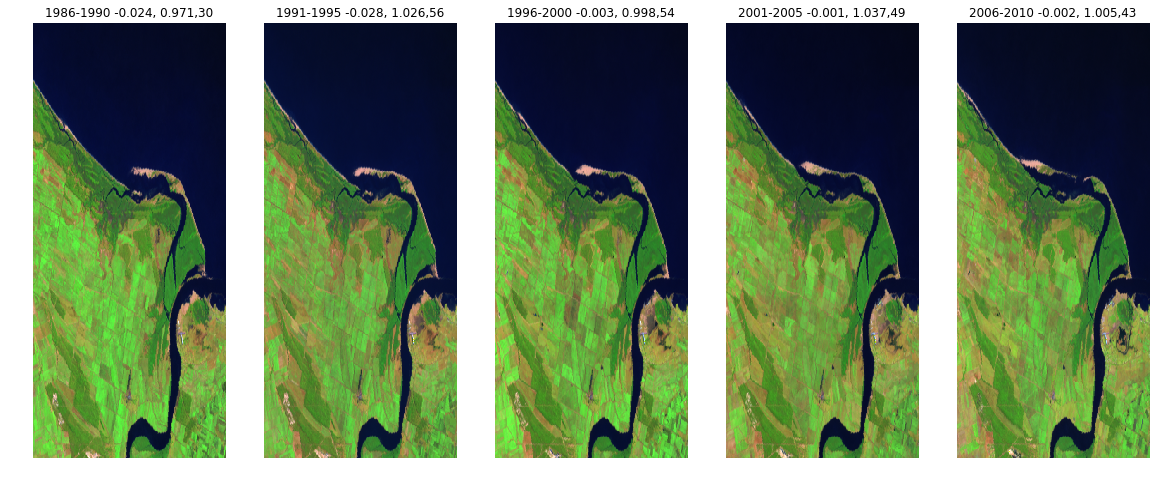

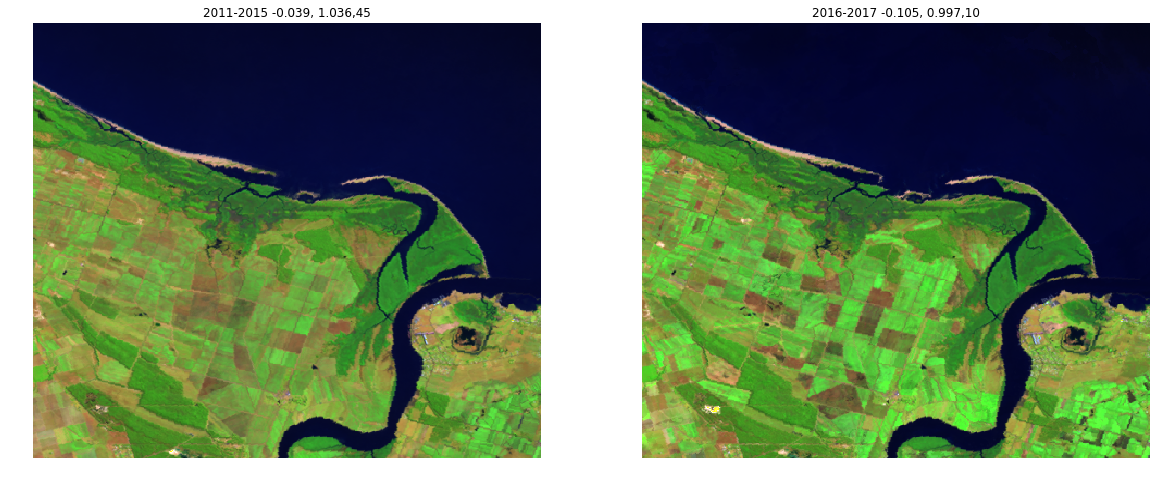

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fake_saturation = 4500
gs1 = GridSpec(1, 5)


m_data = dict()
max_val = 0
for k,v in sorted(MY_GEO.items()):
    #print ("done")
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    break;
for k,v in sorted(MY_GEO.items()):
    #print k
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    # max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    m_data[k] = scaled
ep_list=list()
for k, v in sorted(MY_EPOCH.items()):
    ep_list.append(k)
list_5 = []
for i in range(0, len(ep_list), 5):
    list_5.append(ep_list[i : i+5])
    
#print list_5

for yy, i in enumerate(list_5):
    # print i
    fig = plt.figure(figsize=(20,8))
    if len(i) == 5:
        gs1 = GridSpec(1, 5)
        #fig, axes = plt.subplots(1,5, figsize=(20,8), squeeze=False)
        ax1 = fig.add_subplot(gs1[0])
        ax2 = fig.add_subplot(gs1[1])
        ax3 = fig.add_subplot(gs1[2])
        ax4 = fig.add_subplot(gs1[3])
        ax5 = fig.add_subplot(gs1[4])
        ax5.imshow(m_data[i[4]], interpolation='nearest', aspect='auto')
        ax4.imshow(m_data[i[3]], interpolation='nearest', aspect='auto')
        ax3.imshow(m_data[i[2]], interpolation='nearest', aspect='auto') 
        ax2.imshow(m_data[i[1]], interpolation='nearest', aspect='auto')
        ax1.imshow(m_data[i[0]], interpolation='nearest', aspect='auto') 
        
        ax1.set_title(i[0].split('_')[1].split('-')[0] + '-' + i[0].split('_')[2].split('-')[0] + MY_EPOCH[i[0]])
        ax2.set_title(i[1].split('_')[1].split('-')[0] + '-' + i[1].split('_')[2].split('-')[0] + MY_EPOCH[i[1]])
        ax3.set_title(i[2].split('_')[1].split('-')[0] + '-' + i[2].split('_')[2].split('-')[0] + MY_EPOCH[i[2]])
        ax4.set_title(i[3].split('_')[1].split('-')[0] + '-' + i[3].split('_')[2].split('-')[0] + MY_EPOCH[i[3]])
        ax5.set_title(i[4].split('_')[1].split('-')[0] + '-' + i[4].split('_')[2].split('-')[0] + MY_EPOCH[i[4]])
        ax1.axis('off')
        ax2.axis('off')
        ax3.axis('off')
        ax4.axis('off')
        ax5.axis('off')
        #ax1.set_xlabel(MY_EPOCH[i[0]])
        #ax2.set_xlabel(MY_EPOCH[i[1]])
        #ax3.set_xlabel(MY_EPOCH[i[2]])
        #ax4.set_xlabel(MY_EPOCH[i[3]])
        #ax5.set_xlabel(MY_EPOCH[i[4]])
        
    elif len(i) == 4:
        gs1 = GridSpec(1, 4)
        #fig, axes = plt.subplots(1,4, figsize=(20,8), squeeze=False)
        ax1 = fig.add_subplot(gs1[0])
        ax2 = fig.add_subplot(gs1[1])
        ax3 = fig.add_subplot(gs1[2])
        ax4 = fig.add_subplot(gs1[3])
        ax4.imshow(m_data[i[3]], interpolation='nearest', aspect='auto')
        ax3.imshow(m_data[i[2]], interpolation='nearest', aspect='auto') 
        ax2.imshow(m_data[i[1]], interpolation='nearest', aspect='auto')
        ax1.imshow(m_data[i[0]], interpolation='nearest', aspect='auto')
        ax1.set_title(i[0].split('_')[1].split('-')[0] + '-' + i[0].split('_')[2].split('-')[0] + MY_EPOCH[i[0]])
        ax2.set_title(i[1].split('_')[1].split('-')[0] + '-' + i[1].split('_')[2].split('-')[0] + MY_EPOCH[i[1]])
        ax3.set_title(i[2].split('_')[1].split('-')[0] + '-' + i[2].split('_')[2].split('-')[0] + MY_EPOCH[i[2]])
        ax4.set_title(i[3].split('_')[1].split('-')[0] + '-' + i[3].split('_')[2].split('-')[0] + MY_EPOCH[i[3]])
        ax1.axis('off')
        ax2.axis('off')
        ax3.axis('off')
        ax4.axis('off')
        #ax1.set_xlabel(MY_EPOCH[i[0]])
        #ax2.set_xlabel(MY_EPOCH[i[1]])
        #ax3.set_xlabel(MY_EPOCH[i[2]])
        #ax4.set_xlabel(MY_EPOCH[i[3]])
    elif len(i) == 3:
        gs1 = GridSpec(1, 3)
        #fig, axes = plt.subplots(1,3, figsize=(20,8), squeeze=False)
        ax1 = fig.add_subplot(gs1[0])
        ax2 = fig.add_subplot(gs1[1])
        ax3 = fig.add_subplot(gs1[2])
        ax3.imshow(m_data[i[2]], interpolation='nearest', aspect='auto')
        ax2.imshow(m_data[i[1]], interpolation='nearest', aspect='auto')
        ax1.imshow(m_data[i[0]], interpolation='nearest', aspect='auto')
        ax1.set_title(i[0].split('_')[1].split('-')[0] + '-' + i[0].split('_')[2].split('-')[0] + MY_EPOCH[i[0]])
        ax2.set_title(i[1].split('_')[1].split('-')[0] + '-' + i[1].split('_')[2].split('-')[0] + MY_EPOCH[i[1]])
        ax3.set_title(i[2].split('_')[1].split('-')[0] + '-' + i[2].split('_')[2].split('-')[0] + MY_EPOCH[i[2]])
        ax1.axis('off')
        ax2.axis('off')
        ax3.axis('off')
            
        #ax1.set_xlabel(MY_EPOCH[i[0]])
        #ax2.set_xlabel(MY_EPOCH[i[1]])
        #ax3.set_xlabel(MY_EPOCH[i[2]])
    elif len(i) == 2:
        gs1 = GridSpec(1, 2)
        #fig, axes = plt.subplots(1,2, figsize=(20,8), squeeze=False)
        ax1 = fig.add_subplot(gs1[0])
        ax2 = fig.add_subplot(gs1[1])
        ax2.imshow(m_data[i[1]], interpolation='nearest', aspect='auto')
        ax1.imshow(m_data[i[0]], interpolation='nearest', aspect='auto')
        ax1.set_title(i[0].split('_')[1].split('-')[0] + '-' + i[0].split('_')[2].split('-')[0] + MY_EPOCH[i[0]])
        ax2.set_title(i[1].split('_')[1].split('-')[0] + '-' + i[1].split('_')[2].split('-')[0] + MY_EPOCH[i[1]])
        ax1.axis('off')
        ax2.axis('off')
       
    elif len(i) == 1:
        gs1 = GridSpec(1, 1)
        #fig, axes = plt.subplots(1,1, figsize=(20,8), squeeze=False)
        ax1 = fig.add_subplot(gs1[0])
        ax1.imshow(m_data[i[0]], interpolation='nearest', aspect='auto') 
        ax1.set_title(i[0].split('_')[1].split('-')[0] + '-' + i[0].split('_')[2].split('-')[0] + MY_EPOCH[i[0]])
        ax1.axis('off')
        #ax1.set_xlabel(MY_EPOCH[i[0]]) 
    
    plt.savefig('/g/data/u46/users/bxb547/Bunda_5_' + str(yy) + '.png')
    plt.show()
    


   

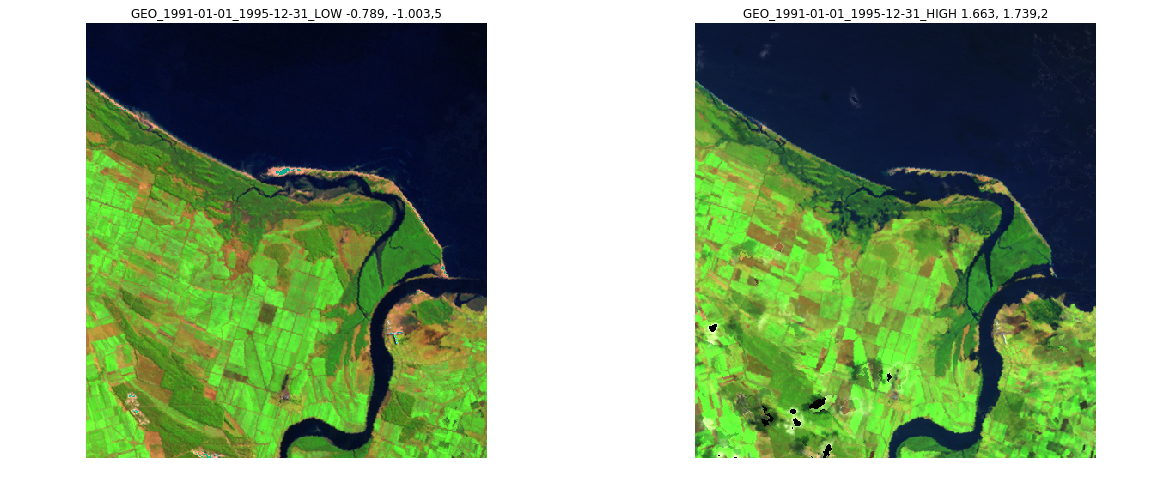

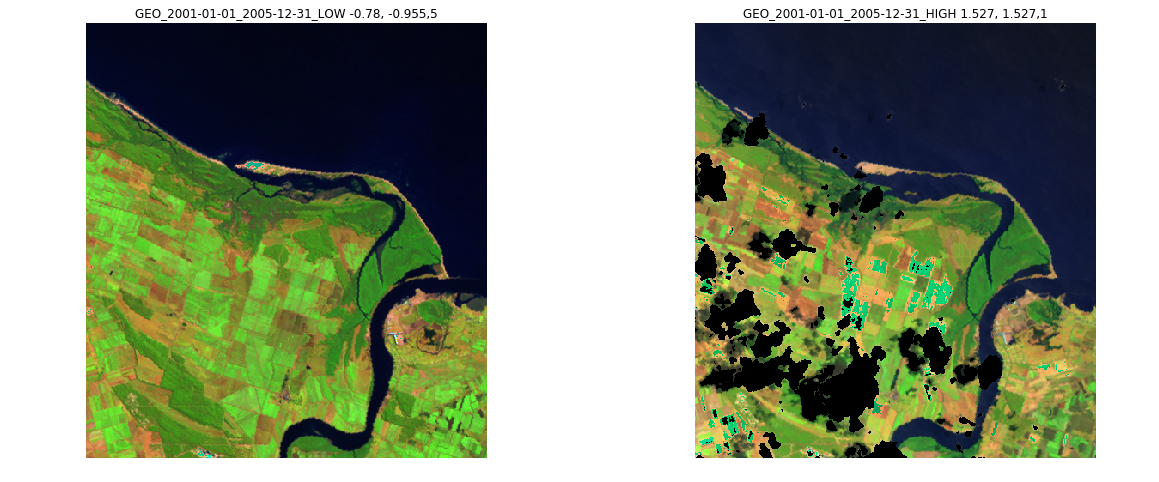

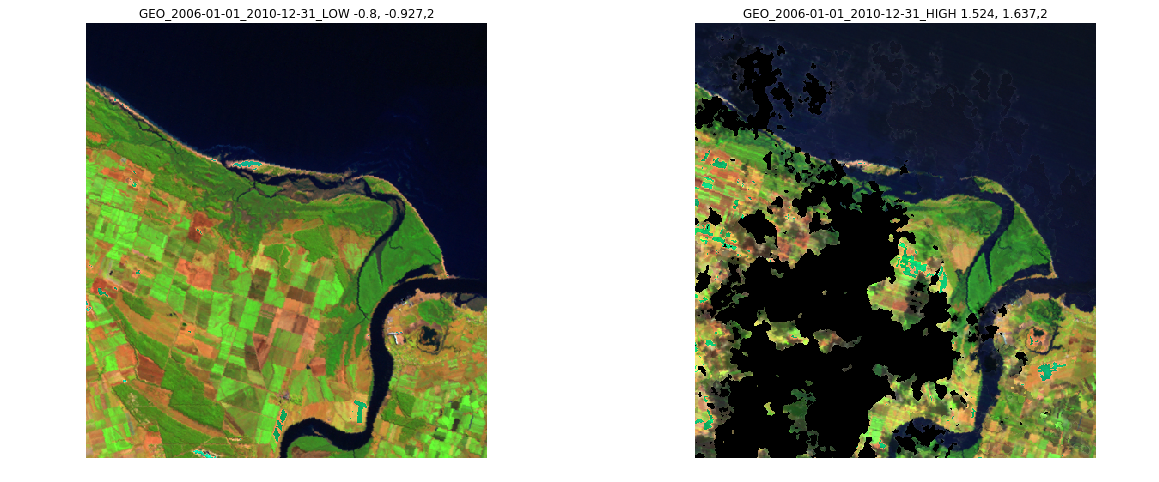

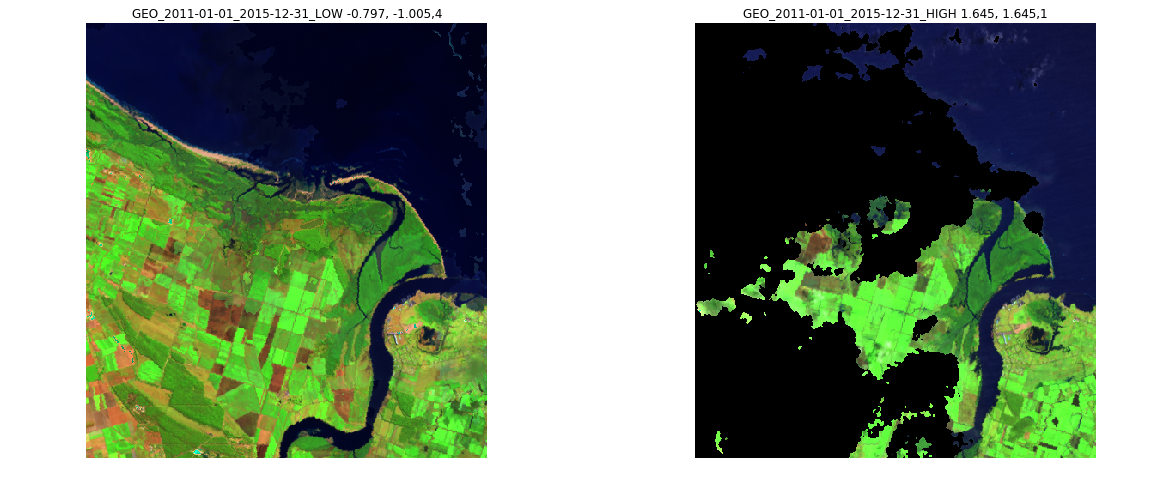

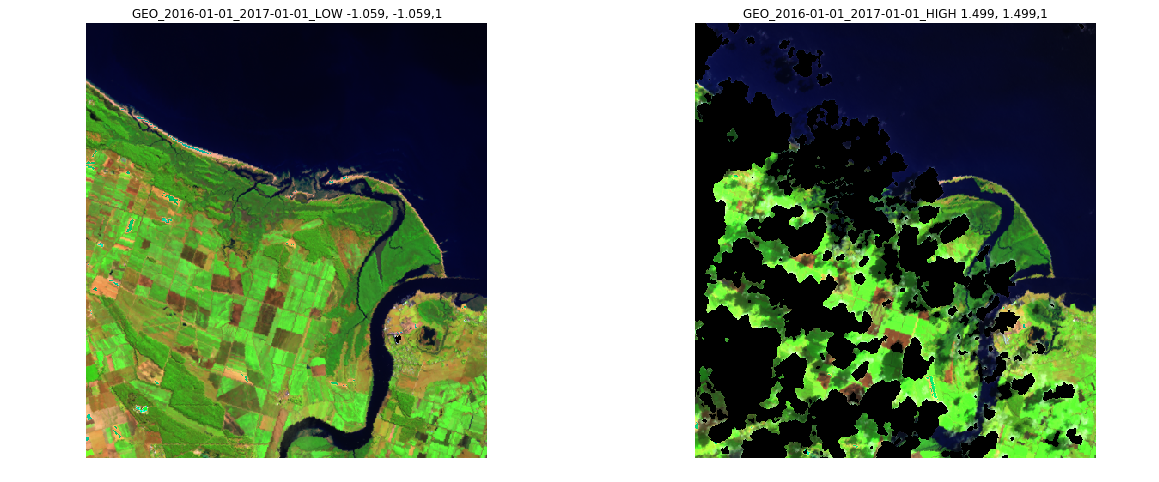

In [96]:
fake_saturation = 4500


m_data = dict()

for k,v in sorted(MY_GEO.items()):
    m_data = MY_GEO[k]
    Z = m_data.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    break

    
for k,v in sorted(MY_GEO.items()):
    
    #print k
    if "HIGH" in k:
        m_data = MY_GEO[k]
        Z = m_data.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
        clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
        scale_high = (clipped_visible / max_val) 
        pr_ky = k
        continue
        
    gs1 = GridSpec(1, 2)
    #fig, axes = plt.subplots(1,2, figsize=(20,8), squeeze=False)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(gs1[0])
    ax1.axis('off')
    ax2 = fig.add_subplot(gs1[1], sharey=ax1)   
    ax2.axis('off')
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
   
    scale_low = (clipped_visible / max_val)
    ax1.imshow(scale_low)
    ax1.set_title(k + MY_EPOCH[k])
    #ax1.set_title(MY_EPOCH[pr_ky], y=-10)
    #ax1.set_xlabel(MY_EPOCH[pr_ky])
    ax2.imshow(scale_high) 
    ax2.set_title(pr_ky + MY_EPOCH[pr_ky])
    #ax2.set_title(MY_EPOCH[k], y=-10)
    #ax2.set_xlabel(MY_EPOCH[k])
    plt.show()
    


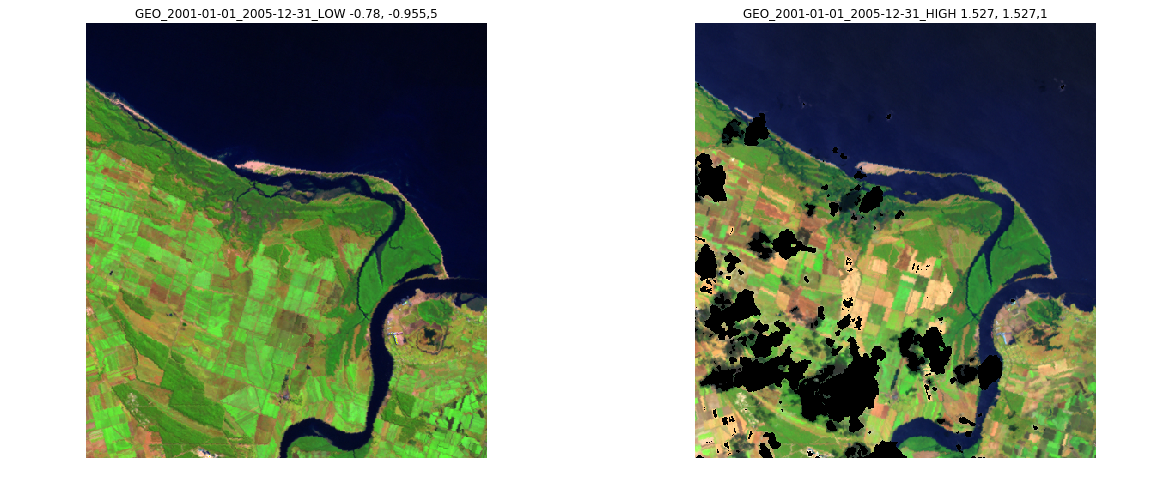

In [92]:
fake_saturation = 4500


m_data = dict()

for k,v in sorted(MY_GEO.items()):
    m_data = MY_GEO[k]
    Z = m_data.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    break


    
for k,v in sorted(MY_GEO.items()):
    
    #print k
    if "HIGH" in k:
        m_data = MY_GEO[k]
        Z = m_data.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
        clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
        scale_high = (clipped_visible / max_val) 
        pr_ky = k
        continue
        
    gs1 = GridSpec(1, 2)
    #fig, axes = plt.subplots(1,2, figsize=(20,8), squeeze=False)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(gs1[0])
    ax1.axis('off')
    ax2 = fig.add_subplot(gs1[1], sharey=ax1)   
    ax2.axis('off')
    Z = MY_GEO[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
   
    scale_low = (clipped_visible / max_val)
    ax1.imshow(scale_low)
    ax1.set_title(k + MY_EPOCH[k])
    #ax1.set_title(MY_EPOCH[pr_ky], y=-10)
    #ax1.set_xlabel(MY_EPOCH[pr_ky])
    ax2.imshow(scale_high) 
    ax2.set_title(pr_ky + MY_EPOCH[pr_ky])
    #ax2.set_title(MY_EPOCH[k], y=-10)
    #ax2.set_xlabel(MY_EPOCH[k])
    plt.show()
    


2015-01-01_2016-01-01_HIGH


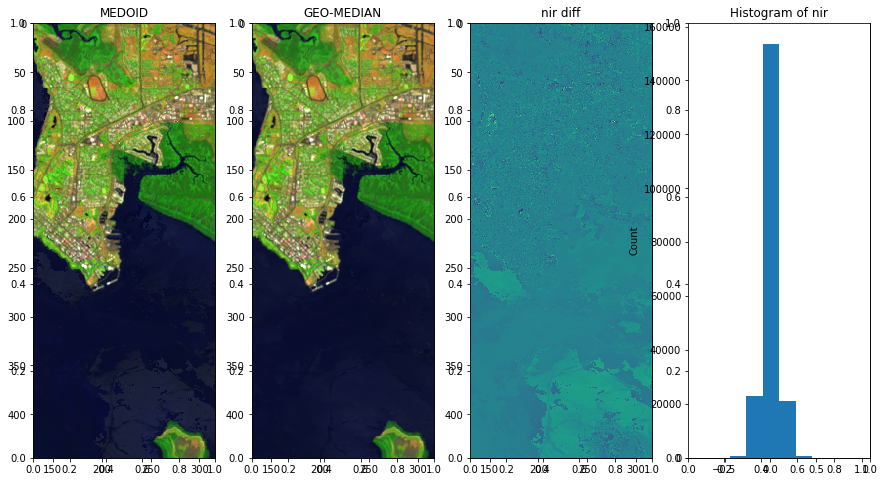

2015-01-01_2016-01-01_LOW


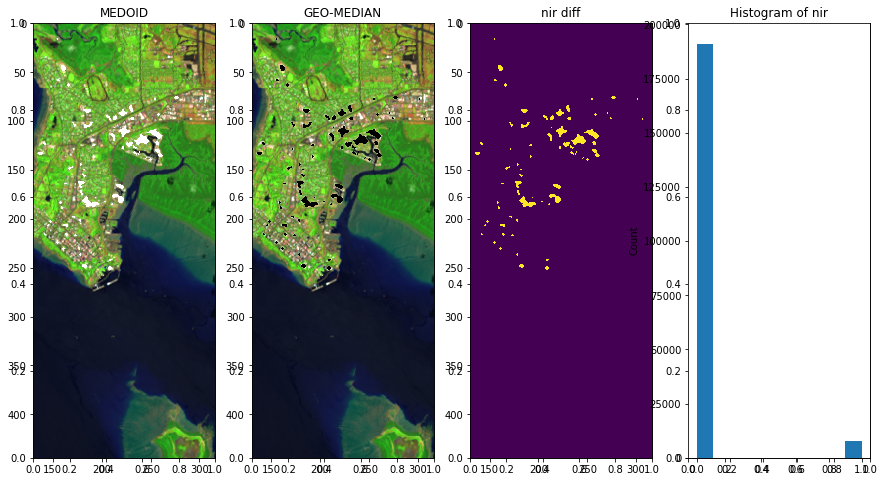

In [14]:
from datacube.storage.storage import write_dataset_to_netcdf
fake_saturation = 4500
gs1 = GridSpec(1, 4)
for (k,v), (k2,v2) in zip(sorted(MY_MEDOID.items()), sorted(MY_GEO.items())):
    print k.split('_' ,1)[1]
    blue_diff = MY_MEDOID[k].blue - MY_GEO[k2].blue
    red_diff = MY_MEDOID[k].red - MY_GEO[k2].red
    green_diff = MY_MEDOID[k].green - MY_GEO[k2].green
    swir1_diff = MY_MEDOID[k].swir1 - MY_GEO[k2].swir1
    nir_diff  = MY_MEDOID[k].nir - MY_GEO[k2].nir
    tt = nir_diff
    
    fig, axes = plt.subplots(1,4, figsize=(15,8))
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1], sharey=ax1)
    ax3 = fig.add_subplot(gs1[2], sharey=ax1)
    ax4 = fig.add_subplot(gs1[3])
    
    Z = MY_MEDOID[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    ax1.imshow(scaled, interpolation='nearest')
    ax1.set_title('MEDOID')
    mp = '/g/data/u46/users/bxb547/' + k+'.nc'
    write_dataset_to_netcdf(MY_MEDOID[k], mp)
    mp =''
    mp = '/g/data/u46/users/bxb547/' + k2+'.nc'
    Z = MY_GEO[k2].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    ax2.imshow(scaled, interpolation='nearest')
    ax2.set_title('GEO-MEDIAN')
    write_dataset_to_netcdf(MY_GEO[k2], mp)
    clipped_visible = tt.where(tt<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    # plt.imshow(scaled, interpolation='nearest', cmap='BuGn')
    ax3.imshow(scaled)
    ax3.set_title('nir diff')
   
    scaled.plot.hist(ax=ax4)
    plt.show()